## Initialisation

In [1]:
!pip install geopandas
!pip install pygeodesy
!pip install pygeodesic
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.4/989.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.3/984.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import folium
import numpy as np
import pdb
import time
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
from geopy.distance import geodesic

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#import statsmodels.api as sm
import statsmodels.formula.api as sma

## Data Importation

In [3]:
# Iris Paris
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Iris/Clean/data_iris_paris.geojson'
irisparis = gpd.read_file(file_path)
irisparis.head(5)

Mounted at /content/drive


,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,shape_Area,geo_point,dep,insee_com,nom_com,iris,code_iris,nom_iris,typ_iris,geometry
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,80920.786958,"{'lon': 2.33473231093, 'lat': 48.8955334043}",75,75118,Paris 18e Arrondissement,6922,751186922,Grandes Carrieres 22,H,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ..."
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,68661.340091,"{'lon': 2.3297484576, 'lat': 48.8945094182}",75,75118,Paris 18e Arrondissement,6923,751186923,Grandes Carrieres 23,H,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ..."
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,73724.514027,"{'lon': 2.3308879204, 'lat': 48.8967235402}",75,75118,Paris 18e Arrondissement,6924,751186924,Grandes Carrieres 24,H,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ..."
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,81608.212989,"{'lon': 2.33742640417, 'lat': 48.8971849905}",75,75118,Paris 18e Arrondissement,6925,751186925,Grandes Carrieres 25,H,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ..."
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,176037.028979,"{'lon': 2.34037476455, 'lat': 48.8999631892}",75,75118,Paris 18e Arrondissement,6926,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ..."


In [4]:
# Immobilier
file_path2 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Immobilier/Clean/Train/75immo_clean_2022.csv'
apartments = pd.read_csv(file_path2)
apartments.head(5)

,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,0,2022-1621603,2022-01-06,1,Vente,605000.0,51.0,NaN,RUE CHARLOT,1880,...,Appartement,42.0,3.0,NaN,NaN,NaN,NaN,NaN,2.362871,48.863374
1,1,2022-1621616,2022-01-07,1,Vente,660000.0,141.0,NaN,RUE DES POISSONNIERS,7564,...,Appartement,81.0,3.0,NaN,NaN,NaN,NaN,NaN,2.352517,48.895742
2,2,2022-1621619,2022-01-07,1,Vente,293000.0,7.0,NaN,RUE SAINT-MARC,8686,...,Appartement,22.0,1.0,NaN,NaN,NaN,NaN,NaN,2.341378,48.870214
3,3,2022-1621625,2022-01-05,1,Vente,300000.0,55.0,NaN,RUE STEPHENSON,9092,...,Appartement,38.0,1.0,NaN,NaN,NaN,NaN,NaN,2.355461,48.889540
4,4,2022-1621629,2022-01-05,1,Vente,335000.0,75.0,NaN,AV NIEL,6773,...,Appartement,33.0,2.0,NaN,NaN,NaN,NaN,NaN,2.295735,48.882706


In [5]:
# Amenité
file_path3 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Amenite/Clean/amenite_geometry.geojson'
amenite = gpd.read_file(file_path3)
amenite.head(5)

,ide,longitude,latitude,geometry
0,terrasses-autorisations_0,2.337336,48.879644,POINT (2.33734 48.87964)
1,terrasses-autorisations_1,2.313040,48.831376,POINT (2.31304 48.83138)
2,terrasses-autorisations_2,2.342332,48.856313,POINT (2.34233 48.85631)
3,terrasses-autorisations_3,2.342860,48.892071,POINT (2.34286 48.89207)
4,terrasses-autorisations_4,2.368621,48.854266,POINT (2.36862 48.85427)


In [6]:
# Immobilier Geometry
file_path4 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Immobilier/Clean/Train/immo_geometry.geojson'
immobilier = gpd.read_file(file_path4)
immobilier.head(5)

,id_mutation,longitude,latitude,geometry
0,2018-743589,2.337476,48.866524,POINT (2.33748 48.86652)
1,2018-743594,2.310473,48.870036,POINT (2.31047 48.87004)
2,2018-743596,2.352721,48.864270,POINT (2.35272 48.86427)
3,2018-743597,2.358997,48.863836,POINT (2.35900 48.86384)
4,2018-743600,2.365106,48.860541,POINT (2.36511 48.86054)


In [7]:
# Iris Revenu
file_path5 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Revenu/Clean/75revenu.csv'
revenu = pd.read_csv(file_path5, sep=';')
revenu.head(5)

# match by  with iris in the iris datafame

,Unnamed: 0,IRIS,DEC_PIMP20,DEC_TP6020,DEC_Q120,DEC_MED20,DEC_Q320,DEC_EQ20,DEC_D120,DEC_D220,...,DEC_S80S2020,DEC_GI20,DEC_PACT20,DEC_PTSA20,DEC_PCHO20,DEC_PBEN20,DEC_PPEN20,DEC_PAUT20,DEC_NOTE20,keep
0,9761,751010101,ns,ns,ns,ns,ns,ns,ns,ns,...,ns,ns,ns,ns,ns,ns,ns,ns,so,1
1,9762,751010102,ns,ns,ns,ns,ns,ns,ns,ns,...,ns,ns,ns,ns,ns,ns,ns,ns,so,1
2,9763,751010103,ns,ns,ns,ns,ns,ns,ns,ns,...,ns,ns,ns,ns,ns,ns,ns,ns,so,1
3,9764,751010104,ns,ns,ns,ns,ns,ns,ns,ns,...,ns,ns,ns,ns,ns,ns,ns,ns,so,1
4,9765,751010105,nd,nd,nd,nd,nd,nd,nd,nd,...,nd,nd,nd,nd,nd,nd,nd,nd,so,1


In [13]:
# Merge the dataframes on the 'IRIS' and 'c_ir' columns
revenuiris = pd.merge(irisparis, revenu[['IRIS', 'DEC_MED20']], left_on='c_ir', right_on='IRIS', how='left')

# Drop the redundant 'IRIS' column
revenuiris.drop('IRIS', axis=1, inplace=True)
revenuiris.set_geometry('geometry', inplace=True)
revenuiris.head(5)

,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,geo_point,dep,insee_com,nom_com,iris,code_iris,nom_iris,typ_iris,geometry,DEC_MED20
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,"{'lon': 2.33473231093, 'lat': 48.8955334043}",75,75118,Paris 18e Arrondissement,6922,751186922,Grandes Carrieres 22,H,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ...",34720
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,"{'lon': 2.3297484576, 'lat': 48.8945094182}",75,75118,Paris 18e Arrondissement,6923,751186923,Grandes Carrieres 23,H,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ...",22870
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,"{'lon': 2.3308879204, 'lat': 48.8967235402}",75,75118,Paris 18e Arrondissement,6924,751186924,Grandes Carrieres 24,H,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ...",21030
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,"{'lon': 2.33742640417, 'lat': 48.8971849905}",75,75118,Paris 18e Arrondissement,6925,751186925,Grandes Carrieres 25,H,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ...",15700
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,"{'lon': 2.34037476455, 'lat': 48.8999631892}",75,75118,Paris 18e Arrondissement,6926,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ...",12410


## Some Visualization

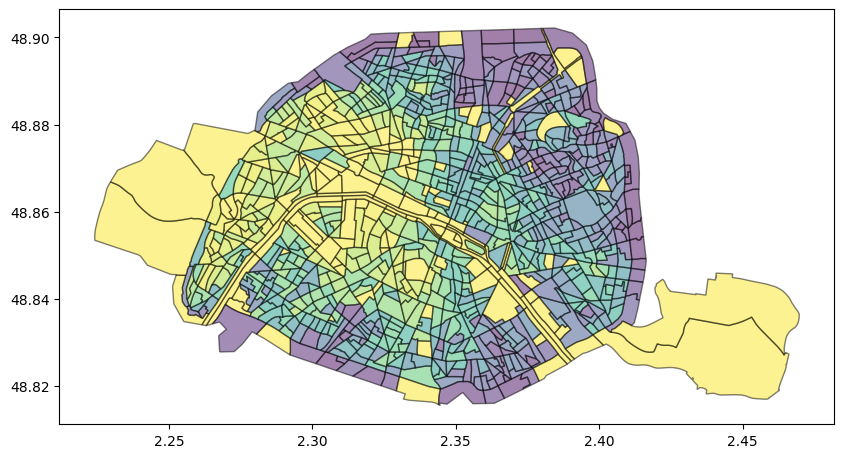

In [10]:
# revenuiris on the map


norm = colors.Normalize(vmin=9000, vmax=18000)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot
revenuiris.plot(ax=ax, alpha=0.5, edgecolor='k', column='DEC_MED20', cmap='viridis',
               legend=False)
plt.show()

In [11]:
revenuiris.columns

Index(['OBJECTID', 'n_sq_ir', 'c_cainsee', 'n_qu', 'c_ir', 'c_typeir', 'l_ir',
       'm2_ip', 'm2_pop', 'm2_emp', 'nb_pop', 'nb_pop_n5', 'nb_pop_1999',
       'nb_evo_pop', 'nb_evo_pop_n5', 'pct_evo_pop', 'pct_evo_pop_n5',
       'nb_surface', 'nb_densite', 'nb_p_age_0', 'nb_p_age_5', 'nb_p_age_10',
       'nb_p_age_15', 'nb_p_age_20', 'nb_p_age_25', 'nb_p_age_30',
       'nb_p_age_35', 'nb_p_age_40', 'nb_p_age_45', 'nb_p_age_50',
       'nb_p_age_55', 'nb_p_age_60', 'nb_p_age_65', 'nb_p_age_70',
       'nb_p_age_75', 'nb_p_age_80', 'nb_p_age_85', 'nb_p_age_90p',
       'nb_age_019', 'nb_age_60p', 'nb_age_65p', 'nb_age_75p', 'pct_age_019',
       'pct_age_60p', 'pct_age_65p', 'pct_age_75p', 'nb_age_019_n5',
       'nb_age_60p_n5', 'nb_age_65p_n5', 'nb_age_75p_n5', 'pct_age_019_n5',
       'pct_age_60p_n5', 'pct_age_65p_n5', 'pct_age_75p_n5', 'pct_evo_age_019',
       'pct_evo_age_60p', 'pct_evo_age_65p', 'pct_evo_age_75p', 'nb_etranger',
       'pct_etranger', 'nb_etranger_n5', 'pct_e

## Feature generation

### Distance to Eiffel tower

In [23]:
# Coordinates of the Eiffel Tower
eiffel_tower_coords = (2.2945, 48.8584)

def calculate_distance(point1, point2):
    return geodesic(point1, point2).kilometers

# Calculate distance from each iris to the Eiffel Tower
revenuiris['distance_to_eiffel_tower'] = revenuiris['geometry'].apply(
    lambda geom: calculate_distance(geom.centroid.coords[0], eiffel_tower_coords)
)

revenuiris


,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,dep,insee_com,nom_com,iris,code_iris,nom_iris,typ_iris,geometry,DEC_MED20,distance_to_eiffel_tower
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,75,75118,Paris 18e Arrondissement,6922,751186922,Grandes Carrieres 22,H,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ...",34720,6.072739
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,75,75118,Paris 18e Arrondissement,6923,751186923,Grandes Carrieres 23,H,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ...",22870,5.600529
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,75,75118,Paris 18e Arrondissement,6924,751186924,Grandes Carrieres 24,H,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ...",21030,5.870012
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,75,75118,Paris 18e Arrondissement,6925,751186925,Grandes Carrieres 25,H,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ...",15700,6.411207
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,75,75118,Paris 18e Arrondissement,6926,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ...",12410,6.863844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,75,75119,Paris 19e Arrondissement,7405,751197405,Pont de Flandre 5,H,"POLYGON ((2.38437 48.89453, 2.38370 48.89564, ...",17030,10.483992
988,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,75,75113,Paris 13e Arrondissement,5108,751135108,Maison Blanche 8,H,"POLYGON ((2.35954 48.81888, 2.35952 48.81901, ...",15430,7.762496
989,2375,750004899,75114,54,751145401,H,Parc de Montsouris 1,361226.973089,51415.733963,101504.657933,...,75,75114,Paris 14e Arrondissement,5401,751145401,Parc de Montsouris 1,H,"POLYGON ((2.34398 48.81580, 2.34407 48.81742, ...",ns,6.423184
990,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,75,75115,Paris 15e Arrondissement,6001,751156001,Javel 1,H,"POLYGON ((2.27825 48.83608, 2.27695 48.83638, ...",16910,3.645824


In [24]:
nearest_index = revenuiris['distance_to_eiffel_tower'].idxmin()
furthest_index = revenuiris['distance_to_eiffel_tower'].idxmax()

# Get the rows
nearest_row = revenuiris.loc[nearest_index]
furthest_row = revenuiris.loc[furthest_index]

print("Nearest to Eiffel Tower:")
print(nearest_row)
print("\nFurthest from Eiffel Tower:")
print(furthest_row)


Nearest to Eiffel Tower:
OBJECTID                                                                  782
n_sq_ir                                                             750004505
c_cainsee                                                               75107
n_qu                                                                       28
c_ir                                                                751072812
                                                  ...                        
nom_iris                                                        Champ de Mars
typ_iris                                                                    D
geometry                    POLYGON ((2.303924190650366 48.85324139622073,...
DEC_MED20                                                                  nd
distance_to_eiffel_tower                                             0.435404
Name: 620, Length: 83, dtype: object

Furthest from Eiffel Tower:
OBJECTID                                           

In [25]:
# centroid coordinates of the nearest
nearest_x, nearest_y = nearest_row['geometry'].centroid.coords[0]

# centroid coordinates of the furthest
furthest_x, furthest_y = furthest_row['geometry'].centroid.coords[0]

print(nearest_x, nearest_y)
print(furthest_x, furthest_y)


Nearest point coordinates (x, y): 2.297745570826208 48.85618355636227
Furthest point coordinates (x, y): 2.440321400618132 48.82656016993193


### West East

ChatGPT: The expression revenuiris.total_bounds returns the bounding box of the entire Paris area covered by the revenuiris dataset. This bounding box is a tuple containing the minimum and maximum values of the x (longitude) and y (latitude) coordinates.

In the expression revenuiris.total_bounds[0] + revenuiris.total_bounds[2]) / 2, we're taking the sum of the minimum and maximum longitudes (which correspond to the first and third elements of the total_bounds tuple) and then dividing by 2. This operation finds the midpoint longitude of the bounding box, effectively giving us a longitude value that divides Paris into two halves.

In [27]:
# longitude that divides Paris into two halves
paris_longitude_divider = (revenuiris.total_bounds[0] + revenuiris.total_bounds[2]) / 2

# if an iris is on the west side
def is_west_side(geometry):
    centroid_longitude = geometry.centroid.x
    return centroid_longitude <= paris_longitude_divider

# Add a binary column to indicate if the iris is on the west side (1) or the east side (0)
revenuiris['is_west_side'] = revenuiris['geometry'].apply(lambda geom: 1 if is_west_side(geom) else 0)

revenuiris

,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,insee_com,nom_com,iris,code_iris,nom_iris,typ_iris,geometry,DEC_MED20,distance_to_eiffel_tower,is_west_side
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,75118,Paris 18e Arrondissement,6922,751186922,Grandes Carrieres 22,H,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ...",34720,6.072739,1
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,75118,Paris 18e Arrondissement,6923,751186923,Grandes Carrieres 23,H,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ...",22870,5.600529,1
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,75118,Paris 18e Arrondissement,6924,751186924,Grandes Carrieres 24,H,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ...",21030,5.870012,1
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,75118,Paris 18e Arrondissement,6925,751186925,Grandes Carrieres 25,H,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ...",15700,6.411207,1
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,75118,Paris 18e Arrondissement,6926,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ...",12410,6.863844,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,75119,Paris 19e Arrondissement,7405,751197405,Pont de Flandre 5,H,"POLYGON ((2.38437 48.89453, 2.38370 48.89564, ...",17030,10.483992,0
988,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,75113,Paris 13e Arrondissement,5108,751135108,Maison Blanche 8,H,"POLYGON ((2.35954 48.81888, 2.35952 48.81901, ...",15430,7.762496,0
989,2375,750004899,75114,54,751145401,H,Parc de Montsouris 1,361226.973089,51415.733963,101504.657933,...,75114,Paris 14e Arrondissement,5401,751145401,Parc de Montsouris 1,H,"POLYGON ((2.34398 48.81580, 2.34407 48.81742, ...",ns,6.423184,1
990,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,75115,Paris 15e Arrondissement,6001,751156001,Javel 1,H,"POLYGON ((2.27825 48.83608, 2.27695 48.83638, ...",16910,3.645824,1
